<a href="https://colab.research.google.com/github/abdulwasaeee/Simple-Linear-Regression/blob/main/SimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
df=pd.read_csv('height-weight.csv')

In [ ]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [ ]:
x=df[["Weight"]]
y=df["Height"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
x_test

,Weight
15,78
9,78
0,45
8,95
17,65
12,105


In [ ]:
scaler=StandardScaler()

In [ ]:
x_train=scaler.fit_transform(x_train)      #standardization
x_test=scaler.transform(x_test)

In [ ]:
x_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [ ]:
lr=LinearRegression(n_jobs=-1)

In [ ]:
lr.fit(x_train,y_train)     #fit best line with training data

LinearRegression(n_jobs=-1)

In [ ]:
lr.coef_

array([17.2982057])

In [ ]:
lr.intercept_

np.float64(156.47058823529412)

In [ ]:
lr.predict(scaler.transform([[70]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([153.88159699])

In [ ]:
y_hat=lr.predict(x_train)

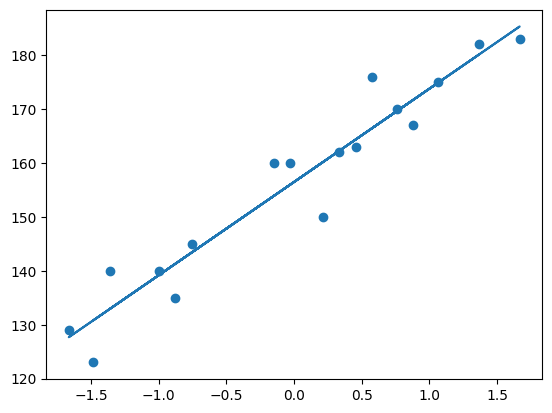

In [ ]:
plt.scatter(x_train,y_train)
plt.plot(x_train,y_hat)

In [ ]:
y_pred=lr.predict(x_test)

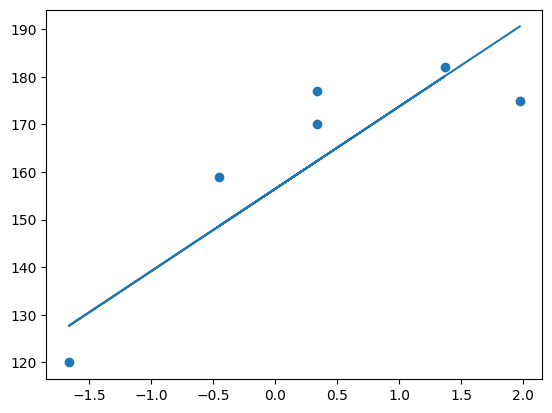

In [ ]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred)

In [ ]:
mse=mean_squared_error(y_test,y_pred)    #performance metrics
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
adjustedr2=1-((1-r2)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))


In [ ]:
print(mse,mae,rmse,r2,adjustedr2)

114.84069295228699 9.66512588679501 10.716374991212605 0.7360826717981276 0.7184881832513361


In [ ]:
x_train2=sm.add_constant(x_train)    #manually fitting intercept

In [ ]:
model=sm.OLS(y_train,x_train2).fit()     #OLS model

In [ ]:
model.summary()

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     174.5
Date:                Fri, 18 Jul 2025   Prob (F-statistic):           1.15e-09
Time:                        13:44:33   Log-Likelihood:                -51.726
No. Observations:                  17   AIC:                             107.5
Df Residuals:                      15   BIC:                             109.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        156.4706      1.310    119.477      0.000     153.679     159.262
x1            17.2982      1.310     13.208      0.000      14.507      20.090
==============================================================================
Omnibus:                        0.135   Durbin-Watson:                   2.354
Prob(Omnibus):                  0.935   Jarque-Bera (JB):                0.203
Skew:                          -0.166   Prob(JB):                        0.904
Kurtosis:                       2.581   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""